# **ASSIGNMENT 3 - CONVOLUTIONAL NETWORKS**

**DOWNLOADING THE DATA:**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajeevvarma","key":"a69eaa8c3552d44e336087d65bbd2728"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:35<00:00, 23.4MB/s]
100% 812M/812M [00:35<00:00, 23.9MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

**COPYING THE IMAGES TO TRAINING, VALIDATION AND TEST DIRECTORIES**

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

**TRAINING THE CONVENT NETWORK FROM SCRATCH:**

**MODEL 1: TRAINING SAMPLE OF 1000, VALIDATION SAMPLE OF 500 AND TEST SAMPLE OF 500**

In [6]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
#Instantiating a small convnet for dogs vs. cats classification:

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_1 = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
Model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
#Configuring the model for training:

Model_1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**DATA PREPROCESSING:**

In [11]:
#Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)
    

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [12]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [13]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [14]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [15]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [16]:
#Displaying the shapes of the data and labels yielded by the Dataset:

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
     

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [17]:
#Fitting the model using a Dataset

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 26ms/step - loss: 0.7153 - accuracy: 0.5120 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6942 - accuracy: 0.5105 - val_loss: 0.6914 - val_accuracy: 0.5150
Epoch 3/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6957 - accuracy: 0.5595 - val_loss: 0.7648 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6660 - accuracy: 0.6010 - val_loss: 0.7372 - val_accuracy: 0.5460
Epoch 5/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6585 - accuracy: 0.6250 - val_loss: 0.6379 - val_accuracy: 0.6220
Epoch 6/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6156 - accuracy: 0.6620 - val_loss: 0.6132 - val_accuracy: 0.6420
Epoch 7/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5908 - accuracy: 0.7000 - val_loss: 0.6237 - val_accuracy: 0.6610
Epoch 8/30
6

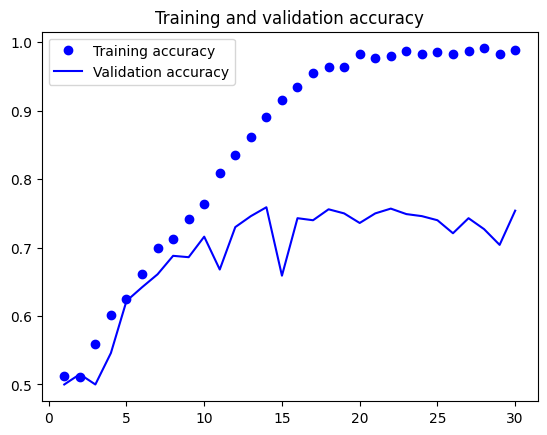

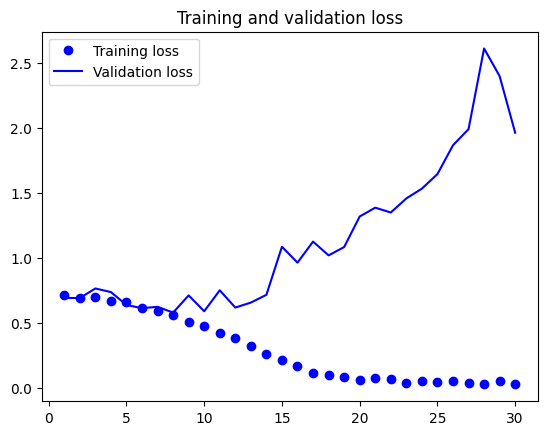

In [18]:
#Displaying curves of loss and accuracy during training:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()#

In [19]:
#Evaluating the model on the test set:

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.5444 - accuracy: 0.7250
Test accuracy: 0.725


**REDUCING THE OVERFITTING MODELS**

**MODEL 2- USING DATA AUGMENTATION:**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [21]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_2 = keras.Model(inputs=inputs, outputs=outputs)

Model_2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 20ms/step - loss: 0.7101 - accuracy: 0.5085 - val_loss: 0.6922 - val_accuracy: 0.5920
Epoch 2/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.5275 - val_loss: 0.6871 - val_accuracy: 0.6100
Epoch 3/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6892 - accuracy: 0.5515 - val_loss: 0.6686 - val_accuracy: 0.5500
Epoch 4/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6623 - accuracy: 0.5985 - val_loss: 0.6429 - val_accuracy: 0.6300
Epoch 5/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6490 - accuracy: 0.6305 - val_loss: 0.6274 - val_accuracy: 0.6620
Epoch 6/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6306 - accuracy: 0.6485 - val_loss: 0.7636 - val_accuracy: 0.5330
Epoch 7/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6306 - accuracy: 0.6555 - val_loss: 0.6110 - val_accuracy: 0.6710
Epoch 8/30
63

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 0s 7ms/step - loss: 0.4068 - accuracy: 0.8220
Test accuracy: 0.822


In [24]:
#Defining a data augmentation stage to add to an image model:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

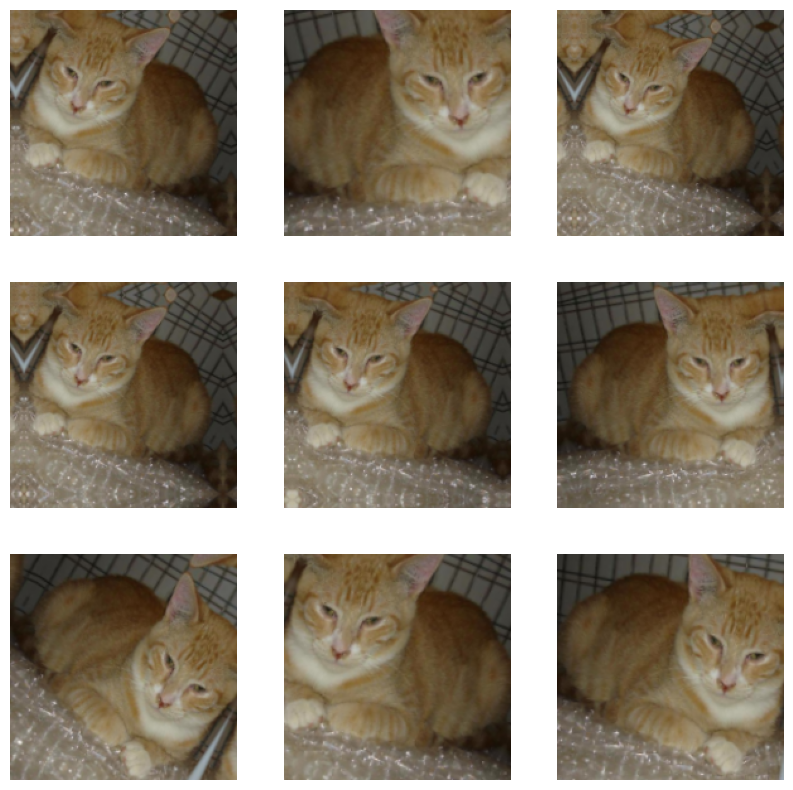

In [25]:
#Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**MODEL 3 - DROPOUT METHOD**

In [26]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_3 = keras.Model(inputs=inputs, outputs=outputs)

Model_3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_3.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 3s 18ms/step - loss: 0.7067 - accuracy: 0.5020 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6961 - accuracy: 0.5230 - val_loss: 0.6912 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6817 - accuracy: 0.5730 - val_loss: 0.6811 - val_accuracy: 0.5630
Epoch 4/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6623 - accuracy: 0.6150 - val_loss: 0.6414 - val_accuracy: 0.6360
Epoch 5/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6168 - accuracy: 0.6605 - val_loss: 0.6931 - val_accuracy: 0.5680
Epoch 6/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6103 - accuracy: 0.6765 - val_loss: 0.6036 - val_accuracy: 0.6800
Epoch 7/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5687 - accuracy: 0.7100 - val_loss: 0.5761 - val_accuracy: 0.6890
Epoch 8/30
63

In [28]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.4803 - accuracy: 0.7800
Test accuracy: 0.780


**MODEL 4 - DATA AUGMENTATION AND DROPOUT METHOD:**

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_4 = keras.Model(inputs=inputs, outputs=outputs)

Model_4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_4.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 3s 20ms/step - loss: 0.6961 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6920 - accuracy: 0.5320 - val_loss: 0.6877 - val_accuracy: 0.5140
Epoch 3/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6866 - accuracy: 0.5645 - val_loss: 0.6638 - val_accuracy: 0.6190
Epoch 4/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6642 - accuracy: 0.6105 - val_loss: 0.6739 - val_accuracy: 0.5950
Epoch 5/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6572 - accuracy: 0.6440 - val_loss: 0.7113 - val_accuracy: 0.5390
Epoch 6/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6390 - accuracy: 0.6395 - val_loss: 0.6305 - val_accuracy: 0.6230
Epoch 7/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6190 - accuracy: 0.6580 - val_loss: 0.6497 - val_accuracy: 0.6170
Epoch 8/30
63

In [32]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.4300 - accuracy: 0.7970
Test accuracy: 0.797


**MODEL 5 - INCREASING THE TRAINING SAMPLE SIZE TO 5000, INCLUDING MAXPOOLING, DATA AUGMENTATION AND DROPOUT TECHNIQUE (DROPOUT RATE = 0.05)**

In [33]:
from tensorflow.keras.utils import image_dataset_from_directory

make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [34]:
#Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_5 = keras.Model(inputs=inputs, outputs=outputs)

Model_5.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

early_stopping_monitor = EarlyStopping(patience=10)

In [36]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

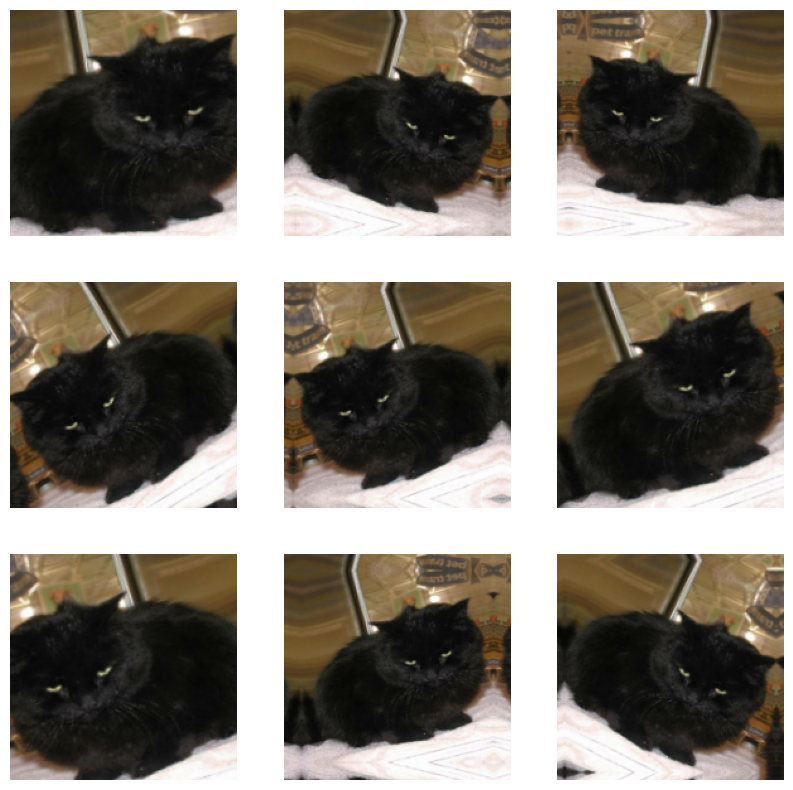

In [37]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = Model_5.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 6s 12ms/step - loss: 0.6825 - accuracy: 0.5700 - val_loss: 0.6749 - val_accuracy: 0.5920
Epoch 2/30
313/313 [==============================] - 4s 12ms/step - loss: 0.6056 - accuracy: 0.6783 - val_loss: 0.5472 - val_accuracy: 0.7300
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5257 - accuracy: 0.7425 - val_loss: 0.4198 - val_accuracy: 0.8080
Epoch 4/30
313/313 [==============================] - 4s 12ms/step - loss: 0.4515 - accuracy: 0.7905 - val_loss: 0.3763 - val_accuracy: 0.8280
Epoch 5/30
313/313 [==============================] - 4s 12ms/step - loss: 0.4044 - accuracy: 0.8183 - val_loss: 0.3521 - val_accuracy: 0.8440
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.3530 - accuracy: 0.8465 - val_loss: 0.3324 - val_accuracy: 0.8460
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 0.3091 - accuracy: 0.8682 - val_loss: 0.1742 - val_accuracy: 0.9350

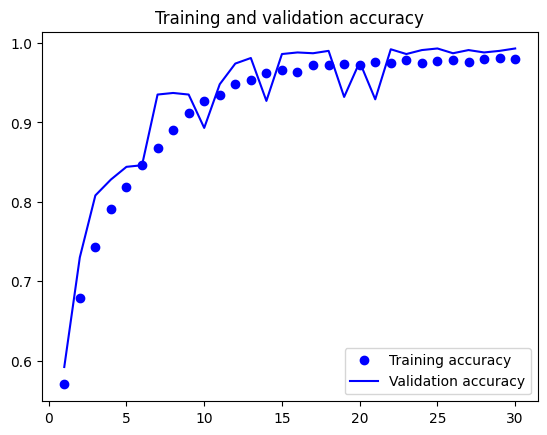

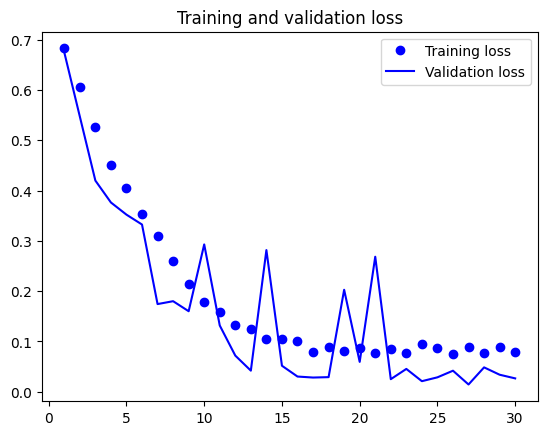

In [39]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [40]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.7188 - accuracy: 0.8760
Test accuracy: 0.876


**MODEL 6 - INCREASING THE TRAINING SAMPLE TO 10000**

In [41]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [42]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_6 = keras.Model(inputs=inputs, outputs=outputs)

Model_6.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

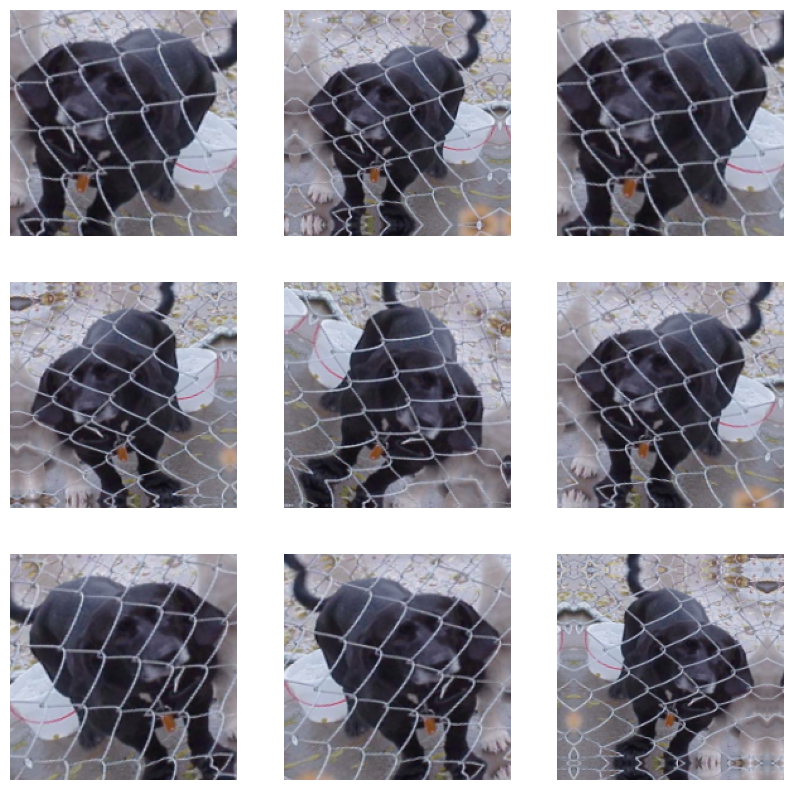

In [44]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [45]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = Model_6.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 9s 12ms/step - loss: 0.6472 - accuracy: 0.6145 - val_loss: 0.5399 - val_accuracy: 0.7260
Epoch 2/30
625/625 [==============================] - 7s 12ms/step - loss: 0.5018 - accuracy: 0.7600 - val_loss: 0.4392 - val_accuracy: 0.8060
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 0.4044 - accuracy: 0.8191 - val_loss: 0.4985 - val_accuracy: 0.7740
Epoch 4/30
625/625 [==============================] - 7s 11ms/step - loss: 0.3328 - accuracy: 0.8562 - val_loss: 0.3185 - val_accuracy: 0.8680
Epoch 5/30
625/625 [==============================] - 7s 12ms/step - loss: 0.2749 - accuracy: 0.8842 - val_loss: 0.2753 - val_accuracy: 0.8740
Epoch 6/30
625/625 [==============================] - 7s 11ms/step - loss: 0.2291 - accuracy: 0.9066 - val_loss: 0.3332 - val_accuracy: 0.8730
Epoch 7/30
625/625 [==============================] - 7s 12ms/step - loss: 0.1969 - accuracy: 0.9213 - val_loss: 0.2442 - val_accuracy: 0.9080

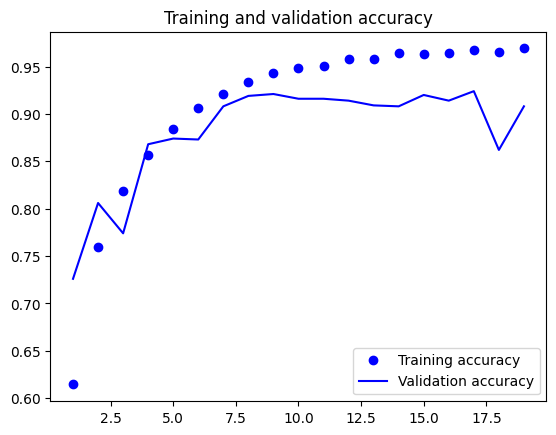

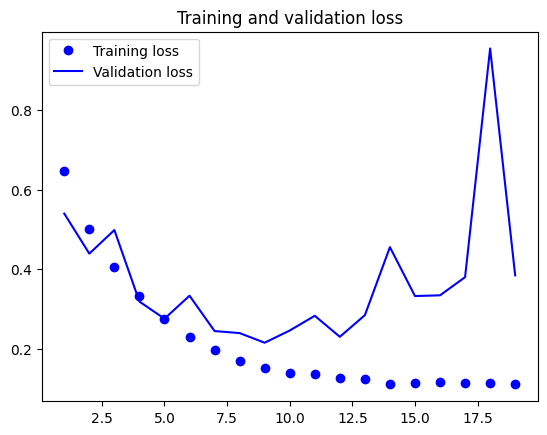

In [46]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [47]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.3935 - accuracy: 0.8840
Test accuracy: 0.884


**INSTANTIATING AND FREEZING THE VGG16 CONVOLUTIONAL BASE**

**PRE-TRAINED MODEL**


**MODEL 7 - SAMPLE SIZE OF 1000**

In [48]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [50]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [51]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [52]:
#Adding a data augmentation stage and a classifier to the convolutional base:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [53]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_7 = keras.Model(inputs, outputs)
Model_7.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [54]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_7.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 45ms/step - loss: 3.1331 - accuracy: 0.7760 - val_loss: 0.8422 - val_accuracy: 0.9200
Epoch 2/30
63/63 [==============================] - 2s 32ms/step - loss: 1.0203 - accuracy: 0.8910 - val_loss: 0.4904 - val_accuracy: 0.9500
Epoch 3/30
63/63 [==============================] - 2s 31ms/step - loss: 0.5576 - accuracy: 0.9225 - val_loss: 0.3786 - val_accuracy: 0.9570
Epoch 4/30
63/63 [==============================] - 2s 28ms/step - loss: 0.4388 - accuracy: 0.9300 - val_loss: 0.4127 - val_accuracy: 0.9560
Epoch 5/30
63/63 [==============================] - 2s 31ms/step - loss: 0.3810 - accuracy: 0.9350 - val_loss: 0.2998 - val_accuracy: 0.9590
Epoch 6/30
63/63 [==============================] - 2s 32ms/step - loss: 0.2808 - accuracy: 0.9485 - val_loss: 0.2457 - val_accuracy: 0.9630
Epoch 7/30
63/63 [==============================] - 2s 32ms/step - loss: 0.2331 - accuracy: 0.9520 - val_loss: 0.2087 - val_accuracy: 0.9660
Epoch 8/30
63

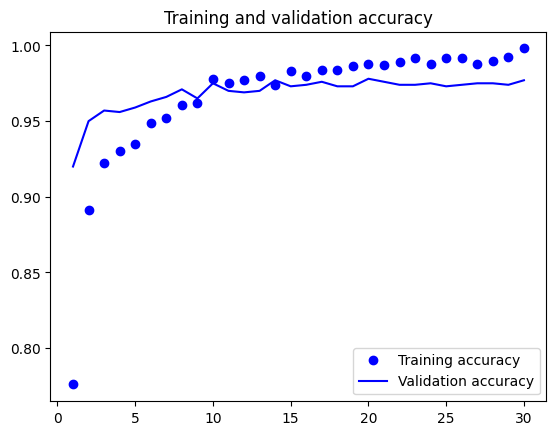

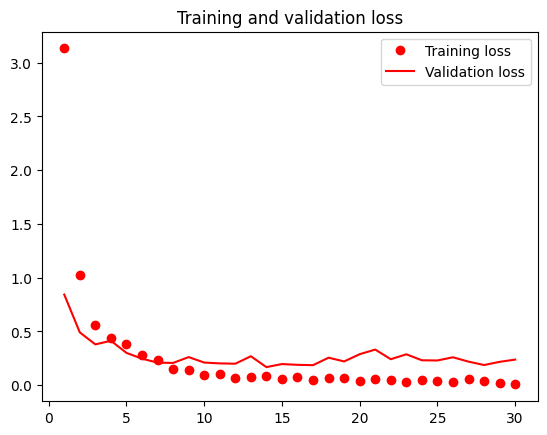

In [55]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [56]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 16ms/step - loss: 0.2058 - accuracy: 0.9780
Test accuracy: 0.978


**MODEL 8 - SAMPLE SIZE OF 5000**

In [57]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [58]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [59]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [60]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_8 = keras.Model(inputs, outputs)
Model_8.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [61]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_8.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 9s 21ms/step - loss: 1.4260 - accuracy: 0.8528 - val_loss: 0.1409 - val_accuracy: 0.9630
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.2462 - accuracy: 0.9261 - val_loss: 0.1153 - val_accuracy: 0.9710
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 0.1675 - accuracy: 0.9478 - val_loss: 0.1007 - val_accuracy: 0.9760
Epoch 4/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1289 - accuracy: 0.9582 - val_loss: 0.1063 - val_accuracy: 0.9750
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1095 - accuracy: 0.9629 - val_loss: 0.1293 - val_accuracy: 0.9730
Epoch 6/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0988 - accuracy: 0.9651 - val_loss: 0.1584 - val_accuracy: 0.9720
Epoch 7/10
313/313 [==============================] - 7s 21ms/step - loss: 0.0882 - accuracy: 0.9748 - val_loss: 0.0969 - val_accuracy: 0.9730

In [62]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.1079 - accuracy: 0.9800
Test accuracy: 0.980


**MODEL 9 - SAMPLE SIZE OF 10000**

In [63]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [64]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [65]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [66]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_9 = keras.Model(inputs, outputs)
Model_9.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [67]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_9.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 14s 19ms/step - loss: 0.7109 - accuracy: 0.9008 - val_loss: 0.1492 - val_accuracy: 0.9650
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1350 - accuracy: 0.9533 - val_loss: 0.1838 - val_accuracy: 0.9730
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1059 - accuracy: 0.9621 - val_loss: 0.1495 - val_accuracy: 0.9680
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0947 - accuracy: 0.9688 - val_loss: 0.1617 - val_accuracy: 0.9750
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0815 - accuracy: 0.9736 - val_loss: 0.1917 - val_accuracy: 0.9780
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0780 - accuracy: 0.9734 - val_loss: 0.2284 - val_accuracy: 0.9750
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0773 - accuracy: 0.9755 - val_loss: 0.1902 - val_accuracy:

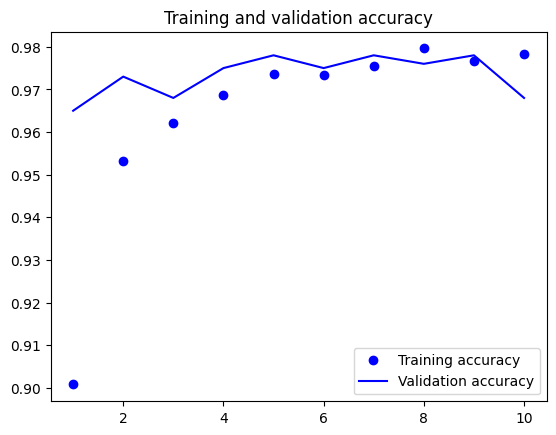

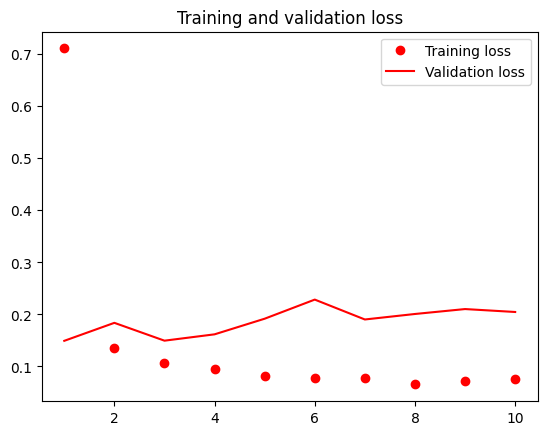

In [68]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [69]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.0873 - accuracy: 0.9730
Test accuracy: 0.973


**SCRATCH MODELS:**

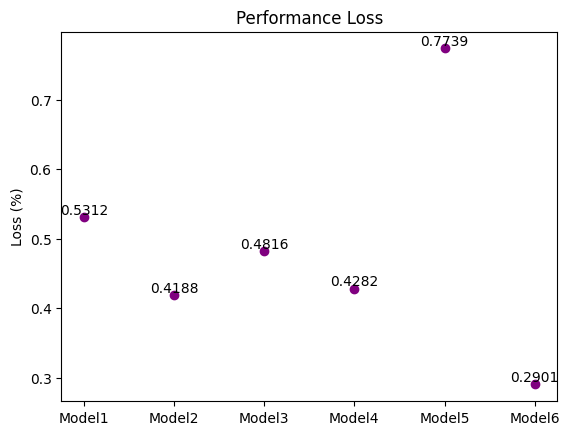

In [70]:
loss_dict = {'Model1': 0.5312, 'Model2': 0.4188, 'Model3': 0.4816, 'Model4': 0.4282,
             'Model5': 0.7739, 'Model6': 0.2901}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')


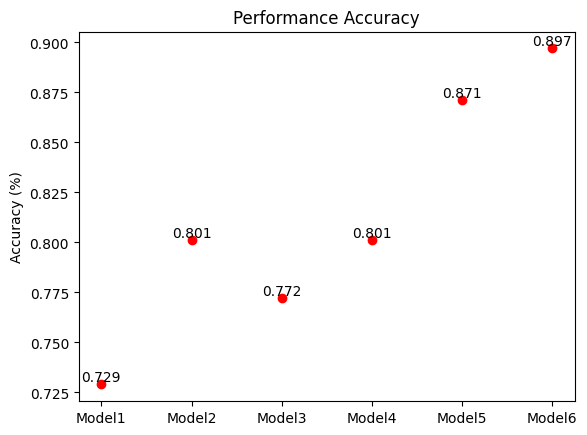

In [71]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.729, 'Model2': 0.801, 'Model3': 0.772, 'Model4': 0.801,
            'Model5': 0.871, 'Model6': 0.897}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

**PRE-TRAINED MODELS:**

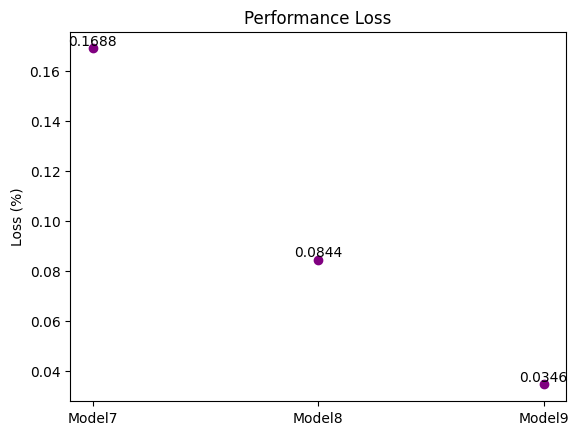

In [72]:
loss_dict = {'Model7': 0.1688, 'Model8': 0.0844, 'Model9': 0.0346}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()


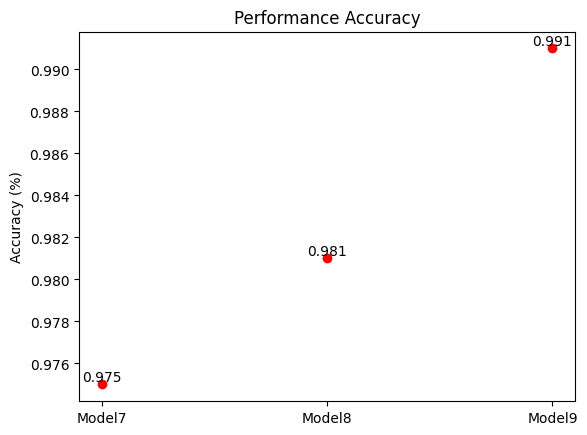

In [73]:
# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model7': 0.975, 'Model8': 0.981, 'Model9': 0.991}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')
